# EDA Continued: Challenge Set 1 Review, Data Checking & Cleaning with Pandas and Viz Tools

Aka, learning how to always expect your data to have more problems.

**Learning Goals**:

1. Review core pandas methods and understand their application to challenge set 1
2. Understand basic methods for data quality checking and cleaning 
3. See examples of how to use visualization as an aid in exploring data quality 

In [4]:
from __future__ import print_function, division

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
import datetime

#### Exercise 1.1

- Open up a new IPython notebook
- Download a few MTA turnstile data files
- Read them into a pandas dataframe (pd.read_csv()), format the columns nicely, and display the first few rows.

In [7]:
# Source: http://web.mta.info/developers/turnstile.html
#Our group is using data from May of 2019, which is before the summer, and not during the pandemic
def get_data(week_nums):
    #http://web.mta.info/developers/data/nyct/turnstile/turnstile_190504.txt
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [190504, 190511, 190518]
turnstiles_df = get_data(week_nums)

In [8]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,00:00:00,REGULAR,7035249,2384833
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,04:00:00,REGULAR,7035269,2384840
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,08:00:00,REGULAR,7035292,2384875
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,12:00:00,REGULAR,7035392,2384951
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,16:00:00,REGULAR,7035651,2385020


In [9]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [10]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [11]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [12]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,00:00:00,REGULAR,7035249,2384833
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,04:00:00,REGULAR,7035269,2384840
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,08:00:00,REGULAR,7035292,2384875
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,12:00:00,REGULAR,7035392,2384951
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,16:00:00,REGULAR,7035651,2385020


In [13]:
turnstiles_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
208676,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/17/2019,01:00:00,REGULAR,5554,376
208677,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/17/2019,05:00:00,REGULAR,5554,376
208678,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/17/2019,09:00:00,REGULAR,5554,376
208679,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/17/2019,17:00:00,REGULAR,5554,376
208680,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/17/2019,21:00:00,REGULAR,5554,378


In [14]:
# Three weeks of Data
turnstiles_df.DATE.value_counts().sort_index()

04/27/2019    28914
04/28/2019    28982
04/29/2019    30972
04/30/2019    28982
05/01/2019    29624
05/02/2019    29871
05/03/2019    29512
05/04/2019    28963
05/05/2019    28954
05/06/2019    29008
05/07/2019    30355
05/08/2019    29280
05/09/2019    28793
05/10/2019    28735
05/11/2019    28807
05/12/2019    28922
05/13/2019    29877
05/14/2019    30074
05/15/2019    30589
05/16/2019    29940
05/17/2019    30472
Name: DATE, dtype: int64


#### Exercise 1.2

- Let's turn this into a time series. Create a new column that stores the date and time as a single pandas datetime object.

In [15]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [16]:
from datetime import datetime as dt

In [17]:
# Take the date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [18]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,00:00:00,REGULAR,7035249,2384833,2019-04-27 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,04:00:00,REGULAR,7035269,2384840,2019-04-27 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,08:00:00,REGULAR,7035292,2384875,2019-04-27 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,12:00:00,REGULAR,7035392,2384951,2019-04-27 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,16:00:00,REGULAR,7035651,2385020,2019-04-27 16:00:00


Alternatively, pandas is so good that it can even automatically parse datetimes as you load in data if you tell it to, as below.

In [19]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data_parse_dt(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url, parse_dates=[['DATE','TIME']], keep_date_col=True))
    return pd.concat(dfs)
        
week_nums = [160903, 160910, 160917]
turnstiles_df_2 = get_data_parse_dt(week_nums)
turnstiles_df_2.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,2016-08-27 00:00:00,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041
1,2016-08-27 04:00:00,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044
2,2016-08-27 08:00:00,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079
3,2016-08-27 12:00:00,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155
4,2016-08-27 16:00:00,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214


### Now let's run some diagnostics on the data and see approaches to cleaning before tackling exercise 3

We can isolate specific turnstiles by creating boolean series masks, then using them to index into the dataframe: 

In [20]:
mask = ((turnstiles_df["C/A"] == "A002") &
        (turnstiles_df["UNIT"] == "R051") & 
        (turnstiles_df["SCP"] == "02-00-00") & 
        (turnstiles_df["STATION"] == "59 ST"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,00:00:00,REGULAR,7035249,2384833,2019-04-27 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,04:00:00,REGULAR,7035269,2384840,2019-04-27 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,08:00:00,REGULAR,7035292,2384875,2019-04-27 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,12:00:00,REGULAR,7035392,2384951,2019-04-27 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,16:00:00,REGULAR,7035651,2385020,2019-04-27 16:00:00


In [21]:
mask = ((turnstiles_df["C/A"] == "R626") & 
(turnstiles_df["UNIT"] == "R062") & 
(turnstiles_df["SCP"] == "00-00-00") & 
(turnstiles_df["STATION"] == "CROWN HTS-UTICA"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
199862,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,04/27/2019,00:00:00,REGULAR,14691323,3232146,2019-04-27 00:00:00
199863,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,04/27/2019,04:00:00,REGULAR,14691345,3232175,2019-04-27 04:00:00
199864,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,04/27/2019,08:00:00,REGULAR,14691524,3232204,2019-04-27 08:00:00
199865,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,04/27/2019,12:00:00,REGULAR,14691995,3232251,2019-04-27 12:00:00
199866,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,04/27/2019,16:00:00,REGULAR,14692435,3232355,2019-04-27 16:00:00


In [22]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(10)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
306201,N525,R142,01-00-03,DELANCEY/ESSEX,2019-05-11 05:00:00,2
88812,G009,R151,02-00-03,CONEY IS-STILLW,2019-05-16 17:00:00,2
306330,N525,R142,01-00-04,DELANCEY/ESSEX,2019-05-11 05:00:00,2
88938,G009,R151,02-00-04,CONEY IS-STILLW,2019-05-16 17:00:00,2
413078,R143,R032,02-00-01,TIMES SQ-42 ST,2019-05-03 04:00:00,1
413079,R143,R032,02-00-01,TIMES SQ-42 ST,2019-05-03 08:00:00,1
413080,R143,R032,02-00-01,TIMES SQ-42 ST,2019-05-03 12:00:00,1
413081,R143,R032,02-00-01,TIMES SQ-42 ST,2019-05-03 16:00:00,1
413082,R143,R032,02-00-01,TIMES SQ-42 ST,2019-05-03 20:00:00,1
413083,R143,R032,02-00-01,TIMES SQ-42 ST,2019-05-04 00:00:00,1


In [23]:
# On 5/11 AND 5/16, we seem to have two entries for two turnstiles at the same time.  Let's take a look
#first investigate SCP 01-00-03 at delancey/essex on 5/11
mask = ((turnstiles_df["C/A"] == "N525") & 
(turnstiles_df["UNIT"] == "R142") & 
(turnstiles_df["SCP"] == "01-00-03") & 
(turnstiles_df["STATION"] == "DELANCEY/ESSEX") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2019, 5, 11).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
102685,N525,R142,01-00-03,DELANCEY/ESSEX,FJMZ,IND,05/11/2019,01:00:00,REGULAR,4452278,3799431,2019-05-11 01:00:00
102686,N525,R142,01-00-03,DELANCEY/ESSEX,FJMZ,IND,05/11/2019,05:00:00,REGULAR,4452483,3799463,2019-05-11 05:00:00
102687,N525,R142,01-00-03,DELANCEY/ESSEX,FJMZ,IND,05/11/2019,05:00:00,RECOVR AUD,4452482,3799463,2019-05-11 05:00:00
102688,N525,R142,01-00-03,DELANCEY/ESSEX,FJMZ,IND,05/11/2019,09:00:00,REGULAR,4452548,3799538,2019-05-11 09:00:00
102689,N525,R142,01-00-03,DELANCEY/ESSEX,FJMZ,IND,05/11/2019,13:00:00,REGULAR,4452803,3799789,2019-05-11 13:00:00


In [24]:
#second investigate SCP 01-00-04 at delancey/essex on 5/11
mask = ((turnstiles_df["C/A"] == "N525") & 
(turnstiles_df["UNIT"] == "R142") & 
(turnstiles_df["SCP"] == "01-00-04") & 
(turnstiles_df["STATION"] == "DELANCEY/ESSEX") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2019, 5, 11).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
102728,N525,R142,01-00-04,DELANCEY/ESSEX,FJMZ,IND,05/11/2019,01:00:00,REGULAR,13012584,11154759,2019-05-11 01:00:00
102729,N525,R142,01-00-04,DELANCEY/ESSEX,FJMZ,IND,05/11/2019,05:00:00,REGULAR,13012859,11154803,2019-05-11 05:00:00
102730,N525,R142,01-00-04,DELANCEY/ESSEX,FJMZ,IND,05/11/2019,05:00:00,RECOVR AUD,13012858,11154803,2019-05-11 05:00:00
102731,N525,R142,01-00-04,DELANCEY/ESSEX,FJMZ,IND,05/11/2019,09:00:00,REGULAR,13012960,11154921,2019-05-11 09:00:00
102732,N525,R142,01-00-04,DELANCEY/ESSEX,FJMZ,IND,05/11/2019,13:00:00,REGULAR,13013321,11155236,2019-05-11 13:00:00


In [25]:
#third investigate SCP 02-00-03 at coney is-stillw on 5/16
mask = ((turnstiles_df["C/A"] == "G009") & 
(turnstiles_df["UNIT"] == "R151") & 
(turnstiles_df["SCP"] == "02-00-03") & 
(turnstiles_df["STATION"] == "CONEY IS-STILLW") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2019, 5, 16).date()))
turnstiles_df[mask].head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
30021,G009,R151,02-00-03,CONEY IS-STILLW,DFNQ,BMT,05/16/2019,01:00:00,REGULAR,339372,479431,2019-05-16 01:00:00
30022,G009,R151,02-00-03,CONEY IS-STILLW,DFNQ,BMT,05/16/2019,05:00:00,REGULAR,339385,479450,2019-05-16 05:00:00
30023,G009,R151,02-00-03,CONEY IS-STILLW,DFNQ,BMT,05/16/2019,09:00:00,REGULAR,339838,479747,2019-05-16 09:00:00
30024,G009,R151,02-00-03,CONEY IS-STILLW,DFNQ,BMT,05/16/2019,13:00:00,REGULAR,340087,479960,2019-05-16 13:00:00
30025,G009,R151,02-00-03,CONEY IS-STILLW,DFNQ,BMT,05/16/2019,17:00:00,REGULAR,340288,480412,2019-05-16 17:00:00
30026,G009,R151,02-00-03,CONEY IS-STILLW,DFNQ,BMT,05/16/2019,17:00:00,RECOVR AUD,340287,480411,2019-05-16 17:00:00
30027,G009,R151,02-00-03,CONEY IS-STILLW,DFNQ,BMT,05/16/2019,21:00:00,REGULAR,340437,480930,2019-05-16 21:00:00


In [26]:
#fourth investigate SCP 02-00-04 at coney is-stillw on 5/16
mask = ((turnstiles_df["C/A"] == "G009") & 
(turnstiles_df["UNIT"] == "R151") & 
(turnstiles_df["SCP"] == "02-00-04") & 
(turnstiles_df["STATION"] == "CONEY IS-STILLW") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2019, 5, 16).date()))
turnstiles_df[mask].head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
30064,G009,R151,02-00-04,CONEY IS-STILLW,DFNQ,BMT,05/16/2019,01:00:00,REGULAR,7535406,10679209,2019-05-16 01:00:00
30065,G009,R151,02-00-04,CONEY IS-STILLW,DFNQ,BMT,05/16/2019,05:00:00,REGULAR,7535433,10679259,2019-05-16 05:00:00
30066,G009,R151,02-00-04,CONEY IS-STILLW,DFNQ,BMT,05/16/2019,09:00:00,REGULAR,7536126,10679594,2019-05-16 09:00:00
30067,G009,R151,02-00-04,CONEY IS-STILLW,DFNQ,BMT,05/16/2019,13:00:00,REGULAR,7536501,10679878,2019-05-16 13:00:00
30068,G009,R151,02-00-04,CONEY IS-STILLW,DFNQ,BMT,05/16/2019,17:00:00,REGULAR,7536822,10680589,2019-05-16 17:00:00
30069,G009,R151,02-00-04,CONEY IS-STILLW,DFNQ,BMT,05/16/2019,17:00:00,RECOVR AUD,7536822,10680584,2019-05-16 17:00:00
30070,G009,R151,02-00-04,CONEY IS-STILLW,DFNQ,BMT,05/16/2019,21:00:00,REGULAR,7537065,10681418,2019-05-16 21:00:00


* Looks to be a incorrect AUD entry.  May be we should just select the Regular One.

In [27]:
turnstiles_df.DESC.value_counts()

REGULAR       616653
RECOVR AUD      2973
Name: DESC, dtype: int64

* Since we are only interested in Entries, we might be OK.

In [28]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [29]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(10)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-04-27 00:00:00,1
413076,R143,R032,02-00-01,TIMES SQ-42 ST,2019-05-02 20:00:00,1
413078,R143,R032,02-00-01,TIMES SQ-42 ST,2019-05-03 04:00:00,1
413079,R143,R032,02-00-01,TIMES SQ-42 ST,2019-05-03 08:00:00,1
413080,R143,R032,02-00-01,TIMES SQ-42 ST,2019-05-03 12:00:00,1
413081,R143,R032,02-00-01,TIMES SQ-42 ST,2019-05-03 16:00:00,1
413082,R143,R032,02-00-01,TIMES SQ-42 ST,2019-05-03 20:00:00,1
413083,R143,R032,02-00-01,TIMES SQ-42 ST,2019-05-04 00:00:00,1
413084,R143,R032,02-00-01,TIMES SQ-42 ST,2019-05-04 04:00:00,1
413085,R143,R032,02-00-01,TIMES SQ-42 ST,2019-05-04 08:00:00,1


* No more duplicate Entries

In [30]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

#### Exercise 1.3

- These counts are for every n hours (What is n?). Also, there's something odd about these "counts", what is it? Do they actually represent total entries for a time period, or something else? We want total daily entries, create a new dataframe with one row per turnstile/day and a column that gives total daily entries.

In [31]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [32]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,04/27/2019,7035930
1,A002,R051,02-00-00,59 ST,04/28/2019,7036621
2,A002,R051,02-00-00,59 ST,04/29/2019,7038042
3,A002,R051,02-00-00,59 ST,04/30/2019,7039520
4,A002,R051,02-00-00,59 ST,05/01/2019,7041075


In [33]:
#turnstiles_daily

In [34]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

In [35]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,04/27/2019,7035930,NaN,NaN
1,A002,R051,02-00-00,59 ST,04/28/2019,7036621,04/27/2019,7035930.0
2,A002,R051,02-00-00,59 ST,04/29/2019,7038042,04/28/2019,7036621.0
3,A002,R051,02-00-00,59 ST,04/30/2019,7039520,04/29/2019,7038042.0
4,A002,R051,02-00-00,59 ST,05/01/2019,7041075,04/30/2019,7039520.0


In [36]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
101574,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/13/2019,5554,05/12/2019,5554.0
101575,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/14/2019,5554,05/13/2019,5554.0
101576,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/15/2019,5554,05/14/2019,5554.0
101577,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/16/2019,5554,05/15/2019,5554.0
101578,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/17/2019,5554,05/16/2019,5554.0


In [37]:
# Drop the rows for the earliest date in the df (prev_entries is NaN )
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

### Next, let's look at some more weirdness in the data and think about handling it before we finalize our daily count column

In [38]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head(20)
                                                                                    

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1614,A025,R023,01-03-01,34 ST-HERALD SQ,04/28/2019,1238466254,04/27/2019,1.238469e+09
1615,A025,R023,01-03-01,34 ST-HERALD SQ,04/29/2019,1238462681,04/28/2019,1.238466e+09
1616,A025,R023,01-03-01,34 ST-HERALD SQ,04/30/2019,1238458809,04/29/2019,1.238463e+09
1617,A025,R023,01-03-01,34 ST-HERALD SQ,05/01/2019,1238454628,04/30/2019,1.238459e+09
1618,A025,R023,01-03-01,34 ST-HERALD SQ,05/02/2019,1238450581,05/01/2019,1.238455e+09
1619,A025,R023,01-03-01,34 ST-HERALD SQ,05/03/2019,1238446326,05/02/2019,1.238451e+09
1620,A025,R023,01-03-01,34 ST-HERALD SQ,05/04/2019,1238443455,05/03/2019,1.238446e+09
1621,A025,R023,01-03-01,34 ST-HERALD SQ,05/05/2019,1238441114,05/04/2019,1.238443e+09
1622,A025,R023,01-03-01,34 ST-HERALD SQ,05/06/2019,1238437551,05/05/2019,1.238441e+09
1623,A025,R023,01-03-01,34 ST-HERALD SQ,05/07/2019,1238433600,05/06/2019,1.238438e+09


In [39]:
# What's the deal with counter being in reverse? Check the first one that appears above.
mask = ((turnstiles_df["C/A"] == "A025") & 
(turnstiles_df["UNIT"] == "R023") & 
(turnstiles_df["SCP"] == "01-03-01") & 
(turnstiles_df["STATION"] == "34 ST-HERALD SQ") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2019, 4, 28).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
3289,A025,R023,01-03-01,34 ST-HERALD SQ,BDFMNQRW,BMT,04/28/2019,20:00:00,1238466254,2019-04-28 20:00:00
3288,A025,R023,01-03-01,34 ST-HERALD SQ,BDFMNQRW,BMT,04/28/2019,16:00:00,1238466864,2019-04-28 16:00:00
3287,A025,R023,01-03-01,34 ST-HERALD SQ,BDFMNQRW,BMT,04/28/2019,12:00:00,1238467303,2019-04-28 12:00:00
3286,A025,R023,01-03-01,34 ST-HERALD SQ,BDFMNQRW,BMT,04/28/2019,08:00:00,1238467523,2019-04-28 08:00:00
3285,A025,R023,01-03-01,34 ST-HERALD SQ,BDFMNQRW,BMT,04/28/2019,04:00:00,1238467596,2019-04-28 04:00:00


* Counter working in Reverse??? - WHHHAT

In [40]:
# Let's see how many stations have this problem

(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A025  R023  01-03-01  34 ST-HERALD SQ    20
A046  R463  00-00-03  CANAL ST            1
A049  R088  02-05-00  CORTLANDT ST       15
A066  R118  00-00-00  CANAL ST           20
C021  R212  00-00-02  59 ST              20
                                         ..
R610  R057  00-03-01  ATL AV-BARCLAY      2
R622  R123  00-00-00  FRANKLIN AV        20
R629  R065  00-00-00  ROCKAWAY AV         1
R646  R110  01-00-01  FLATBUSH AV-B.C    20
R730  R431  00-00-04  EASTCHSTER/DYRE    20
Length: 118, dtype: int64

In [41]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

1377 4767345.0
335092173 3421982.0
134 3072837.0
39 4605263.0
131075 2222463.0
2223006 131075.0
65536 839317244.0
184608339 746400.0
190 2898303.0
50 1544151.0
524 3911943.0
196614 2998634.0
326 3755677.0
735 2021820.0
273 8876303.0
196626 68461837.0
146 36965539.0
907 2357444.0
12 4887261.0
767 9441238.0
1058618 102390450.0
2084 7603756.0
1198 1068342.0
148 6333363.0
30933984 6069289.0
115 12739117.0
1121 6546757.0
16779383 81078.0
637574735 2502638.0
68859001 436510383.0
607126675 594262.0
140397276 1577638216.0
458752 100663296.0
119 7480347.0
683737068 458752.0
905996399 3558247.0
3 5176463.0
1715 13653626.0
182 10462950.0
2063649350 8123276.0
1129054802 2501541.0


In [42]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

1377 4767345.0
335092173 3421982.0
134 3072837.0
39 4605263.0
131075 2222463.0
2223006 131075.0
65536 839317244.0
184608339 746400.0
190 2898303.0
50 1544151.0
524 3911943.0
196614 2998634.0
326 3755677.0
735 2021820.0
273 8876303.0
196626 68461837.0
146 36965539.0
907 2357444.0
12 4887261.0
767 9441238.0
1058618 102390450.0
2084 7603756.0
1198 1068342.0
148 6333363.0
30933984 6069289.0
115 12739117.0
1121 6546757.0
16779383 81078.0
637574735 2502638.0
68859001 436510383.0
607126675 594262.0
140397276 1577638216.0
458752 100663296.0
119 7480347.0
683737068 458752.0
905996399 3558247.0
3 5176463.0
1715 13653626.0
182 10462950.0
2063649350 8123276.0
1129054802 2501541.0


In [43]:
turnstiles_daily.head(10)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,04/28/2019,7036621,04/27/2019,7035930.0,691.0
2,A002,R051,02-00-00,59 ST,04/29/2019,7038042,04/28/2019,7036621.0,1421.0
3,A002,R051,02-00-00,59 ST,04/30/2019,7039520,04/29/2019,7038042.0,1478.0
4,A002,R051,02-00-00,59 ST,05/01/2019,7041075,04/30/2019,7039520.0,1555.0
5,A002,R051,02-00-00,59 ST,05/02/2019,7042630,05/01/2019,7041075.0,1555.0
6,A002,R051,02-00-00,59 ST,05/03/2019,7044206,05/02/2019,7042630.0,1576.0
7,A002,R051,02-00-00,59 ST,05/04/2019,7045028,05/03/2019,7044206.0,822.0
8,A002,R051,02-00-00,59 ST,05/05/2019,7045663,05/04/2019,7045028.0,635.0
9,A002,R051,02-00-00,59 ST,05/06/2019,7047102,05/05/2019,7045663.0,1439.0
10,A002,R051,02-00-00,59 ST,05/07/2019,7048572,05/06/2019,7047102.0,1470.0


We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, sum the counts from each turnstile belonging to that combo. (hint: pd.groupby)

In [49]:
station_turnstiles_daily = (turnstiles_daily
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .DAILY_ENTRIES.first())
station_turnstiles_daily.head(30)

,C/A,UNIT,SCP,STATION,DATE,DAILY_ENTRIES
0,A002,R051,02-00-00,59 ST,04/28/2019,691.0
1,A002,R051,02-00-00,59 ST,04/29/2019,1421.0
2,A002,R051,02-00-00,59 ST,04/30/2019,1478.0
3,A002,R051,02-00-00,59 ST,05/01/2019,1555.0
4,A002,R051,02-00-00,59 ST,05/02/2019,1555.0
5,A002,R051,02-00-00,59 ST,05/03/2019,1576.0
6,A002,R051,02-00-00,59 ST,05/04/2019,822.0
7,A002,R051,02-00-00,59 ST,05/05/2019,635.0
8,A002,R051,02-00-00,59 ST,05/06/2019,1439.0
9,A002,R051,02-00-00,59 ST,05/07/2019,1470.0


In [1]:
# Verify that we got same results via the non-pandas version.

## Bonus: EDA Visualizations & Viz Review

So we've gotten the data into a cleaner state, but are all the issues really resolved? It's a good idea to do some sanity checking at the turnstile level, but also at the **station level**. Here we'll see a couple of good/standard EDA approaches applied to this data, that leverage plots to better understand what we're working with.

Do we get results we'd expect based on our domain knowledge of NYC, and can we detect anything else that's clearly an anomaly?

First, let's look at the distribution of daily entries for turnstiles to check that it's sensible. What type of plot can we use? 

In [44]:
## EX: Fill in the standard plotting imports (matplotlib and seaborn)
import matplotlib.pyplot as plt

%matplotlib inline


In [0]:
## EX: Generate a plot that visualizes the distribution 
## of daily turnstile entries. 


station_turnstiles_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])
station_turnstiles_daily.plot(x='DATE', y='DAILY_ENTRIES')


## How would you characterize this distribution?




In [0]:
## EX: Generate a plot that compares the distributions of daily traffic 
## by station, for the top 10 stations by volume. What insights can we
## gain from this plot?

## Hint: break this down into steps: we need to go from daily entries 
## for turnstiles to stations, find the top 10 stations, and filter
## the station-level data down to the top 10.





## Bonus Solutions

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

### Distribution of turnstile daily entries

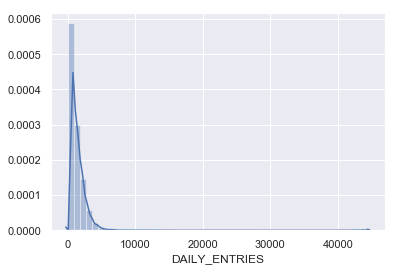

In [0]:
sns.distplot(turnstiles_daily['DAILY_ENTRIES']
             [turnstiles_daily['DAILY_ENTRIES'] < 50000])

This is a right-skewed distribution (the mean is to the right of the median). It's good that there are no values less than 0 now, but it seems there are still entry values that are likely too extreme to be sensible. 

### Distribution of daily entries by station, for top 10 stations by volume

In [0]:
# first get daily entries by station
stations_daily = \
(turnstiles_daily.groupby(['STATION','DATE'])['DAILY_ENTRIES'].sum()
                 .reset_index())

stations_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,08/28/2016,13871.0
1,1 AV,08/29/2016,18064.0
2,1 AV,08/30/2016,19182.0
3,1 AV,08/31/2016,19616.0
4,1 AV,09/01/2016,20170.0


In [0]:
# then get top 10 stations by daily volume 
# (sum across all days is a reasonable way to define this)
top10_stations = \
    (stations_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .STATION.head(10))

top10_stations

61      34 ST-PENN STA
230    GRD CNTRL-42 ST
59     34 ST-HERALD SQ
46               23 ST
170           CANAL ST
14      14 ST-UNION SQ
109              86 ST
68     42 ST-PORT AUTH
348     TIMES SQ-42 ST
223          FULTON ST
Name: STATION, dtype: object

In [0]:
# next create a new df that filters the stations daily data down
# to the top 10 stations
stations_daily_top10 = \
    stations_daily[stations_daily['STATION'].isin(top10_stations)]

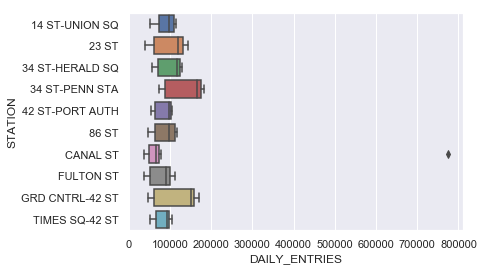

In [0]:
# use seaborn to create a boxplot by station
sns.boxplot('DAILY_ENTRIES', 'STATION', data=stations_daily_top10)

Two key things we should notice from these quick EDA steps:

- Using our knowledge of NYC, it **doesn't seem right that these are the top 10 stations**. Some are reasonable like grand central and times square, but is 23rd street really that popular? A next step here would be to dig into turnstiles in "23 ST" (hint: check the line names for different instances of 23 ST, is it really one station?) 


- There's still a **clear outlier in daily traffic for Canal St**, we should be able to figure out what's causing this by digging into it. Maybe our cleaning process is not quite enough yet (1 million is too large a cutoff!)